## Данный файл предназначен для того, чтобы разобраться как строить графики по данным из файлов .csv

`Ниже будут представлены полезные ссылки, которые мне помогали с составлением этого файла.`

---> https://pythonru.com/primery/pandas-na-primerah 
-Работа с pandas

---> https://ru.hexlet.io/courses/python-pandas/lessons/index-rules/theory_unit 
-Работа с индексами в pandas

--> https://sky.pro/wiki/pythonustranyaem-indeks-stolbets-v-pandas-csv-bez-key-error/ 
-Устраняем индекс-столбец в pandas CSV: без KeyError

---> https://www.codecamp.ru/blog/drop-index-pandas/ 
-Как удалить столбец индекса в Pandas (с примерами)

---> https://www.youtube.com/watch?v=LLFOZ2vN7ss&t=902s 
-Как оформить текст в Jupyter Notebook с помощью Markdown

### Подключение библиотек

In [1238]:
import pandas as pd
import matplotlib.ticker as ticker
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift

In [1239]:
# Считаем данные из CSV-файла 
# ctrl + / - закомментировать кусок кода
data_5_2 = pd.read_csv('scope_csv_139_0.csv', index_col= False) # Чтение файла в переменную

data_5_4_1 = pd.read_csv('scope_csv_140_2.csv', index_col= False) # Чтение файла в переменную
data_5_4_2 = pd.read_csv('scope_csv_140_3.csv', index_col= False) # Чтение файла в переменную

# data_5_4_1 = pd.read_csv('denchik_1.csv', index_col= False) # Чтение файла в переменную
# data_5_4_2 = pd.read_csv('denchik_2.csv', index_col= False) # Чтение файла в переменную

data_5_5_1 = pd.read_csv('scope_csv_140_4.csv', index_col= False) # Чтение файла в переменную
data_5_5_2 = pd.read_csv('scope_csv_140_5.csv', index_col= False) # Чтение файла в переменную
data_5_5_3 = pd.read_csv('scope_csv_140_6.csv', index_col= False) # Чтение файла в переменную

data_5_6_1 = pd.read_csv('scope_csv_140_7.csv', index_col= False) # Чтение файла в переменную
data_5_6_2 = pd.read_csv('scope_csv_140_8.csv', index_col= False) # Чтение файла в переменную
data_5_6_3 = pd.read_csv('scope_csv_140_9.csv', index_col= False) # Чтение файла в переменную

```python
 index_col= False  # сбрасывает индекс при импорте!
``` 
#### `Удалять столбец индекса нужно для корректного соответствия данных !`

### Посмотрим как отображается наша таблица. Выведем её верхнюю часть

In [1240]:
data_5_2.head()

,Time [s],CH1 [V]
0,2.000000e-08,0.72
1,2.000000e-08,0.76
2,2.000000e-08,0.84
3,2.000000e-08,0.80
4,2.000000e-08,0.80


In [1241]:
data_5_4_1.head()

,Time [s],CH1 [V]
0,8.000000e-07,1.92
1,8.000000e-07,1.88
2,8.000000e-07,1.88
3,8.000000e-07,1.96
4,8.000000e-07,1.88


In [1242]:
data_5_4_2.head()

,Time [s],CH1 [V]
0,8.000000e-07,1.88
1,8.000000e-07,1.88
2,8.000000e-07,1.92
3,8.000000e-07,1.88
4,8.000000e-07,1.84


In [1243]:
data_5_5_1.head()

,Time [s],CH1 [V],CH2 [V]
0,8.000000e-09,2.16,2.14
1,8.000000e-09,2.20,2.14
2,8.000000e-09,2.16,2.14
3,8.000000e-09,2.14,2.12
4,8.000000e-09,2.14,2.12


In [1244]:
data_5_5_2.head()

,Time [s],CH1 [V],CH2 [V]
0,8.000000e-09,2.18,2.14
1,8.000000e-09,2.16,2.12
2,8.000000e-09,2.12,2.14
3,8.000000e-09,2.12,2.12
4,8.000000e-09,2.10,2.14


In [1245]:
data_5_5_3.head()

,Time [s],CH1 [V],CH2 [V]
0,8.000000e-09,2.10,2.12
1,8.000000e-09,2.10,2.10
2,8.000000e-09,2.10,2.12
3,8.000000e-09,2.14,2.12
4,8.000000e-09,2.14,2.12


In [1246]:
data_5_6_1.head()

,Time [s],CH1 [V],CH2 [V]
0,8.000000e-09,4.20,4.08
1,8.000000e-09,4.20,4.12
2,8.000000e-09,4.16,4.12
3,8.000000e-09,4.20,4.12
4,8.000000e-09,4.12,4.12


In [1247]:
data_5_6_2.head()

,Time [s],CH1 [V],CH2 [V]
0,8.000000e-09,4.16,4.12
1,8.000000e-09,4.16,4.12
2,8.000000e-09,4.16,4.08
3,8.000000e-09,4.16,4.12
4,8.000000e-09,4.16,4.12


In [1248]:
data_5_6_3.head()

,Time [s],CH1 [V],CH2 [V]
0,8.000000e-09,4.16,4.12
1,8.000000e-09,4.16,4.12
2,8.000000e-09,4.16,4.12
3,8.000000e-09,4.16,4.16
4,8.000000e-09,4.16,4.08


В столбце CH2 [V];;;;;; присутствуют лишние символы (;;;;;;), которые могут мешать правильному извлечению данных._

`Код ниже демонстрирует как можно убрать лишнии символы из столбцов и строк таблицы 
.csv`

In [1249]:
# Убираем лишние символы из названий столбцов
data_5_2.columns = data_5_2.columns.str.replace(r';+', '', regex=True)
# Удаляем лишние символы в строках данных
data = data_5_2.replace(r';+', '', regex=True)
# Теперь названия столбцов корректны: 'Time [s]', 'CH1 [V]', 'CH2 [V]'

### Проверим как теперь отображается .csv таблица

In [1250]:
data_5_2.head()

,Time [s],CH1 [V]
0,2.000000e-08,0.72
1,2.000000e-08,0.76
2,2.000000e-08,0.84
3,2.000000e-08,0.80
4,2.000000e-08,0.80


In [1251]:
print(data_5_2['CH1 [V]'].head(10))  # Проверим первые 10 значений

0    0.72
1    0.76
2    0.84
3    0.80
4    0.80
5    0.84
6    0.88
7    0.84
8    0.80
9    0.88
Name: CH1 [V], dtype: float64


### 5.2 Измерение характеристики ФД


In [1252]:
discrete_time = 2.000000e-08 # значение дискрета по времени, взятое из таблицы csv

# Создание вектора времени
time = np.arange(0, 2000 * discrete_time, discrete_time)
time_mks = time * 1e6 # Перевод времени в микросекунды (умножаем на 10^6)

time_phi = np.arange(0, 999 * discrete_time, discrete_time)
time_mks_phi = time_phi * 1e6 # Перевод времени в микросекунды (умножаем на 10^6)

# Извлечение данных из столбца CH1

E_FD = data_5_2.iloc[0:2001]['CH1 [V]'] # вырезаем строки с нулевой по двухтысячную из стобца CH1 [V]
E_FD_phi = data_5_2.iloc[430:1430]['CH1 [V]'] # вырезаем строки с нулевой по двухтысячную из стобца CH1 [V]


#display(ch1.iloc[1000]) # iloc() — метод выбора строк согласно их числовой позиции
                        #loc() — метод выбора данных на основе меток строк


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


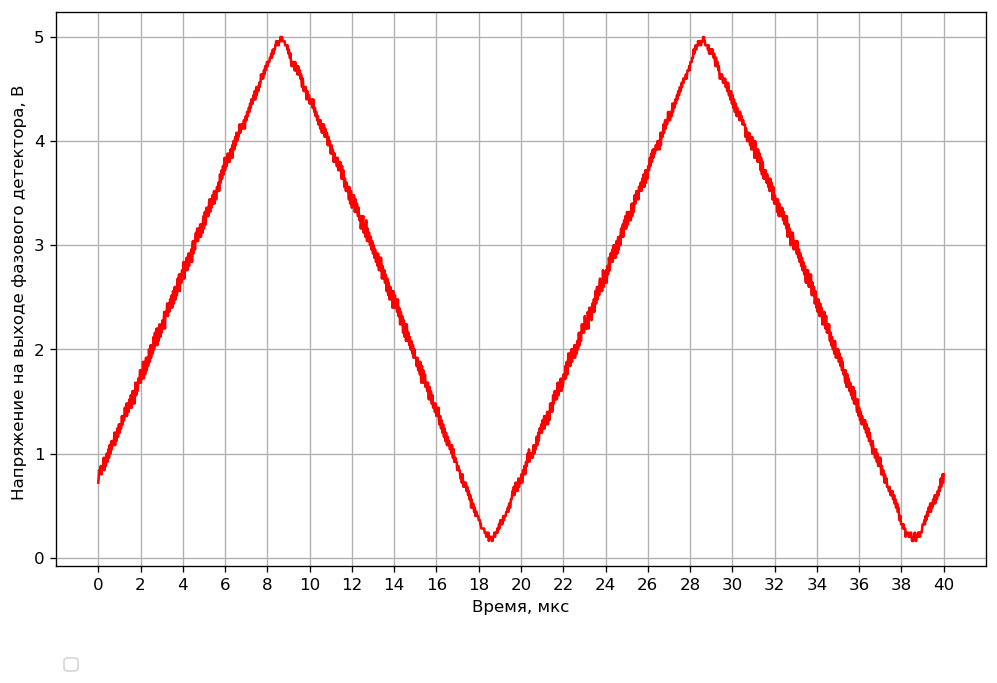

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


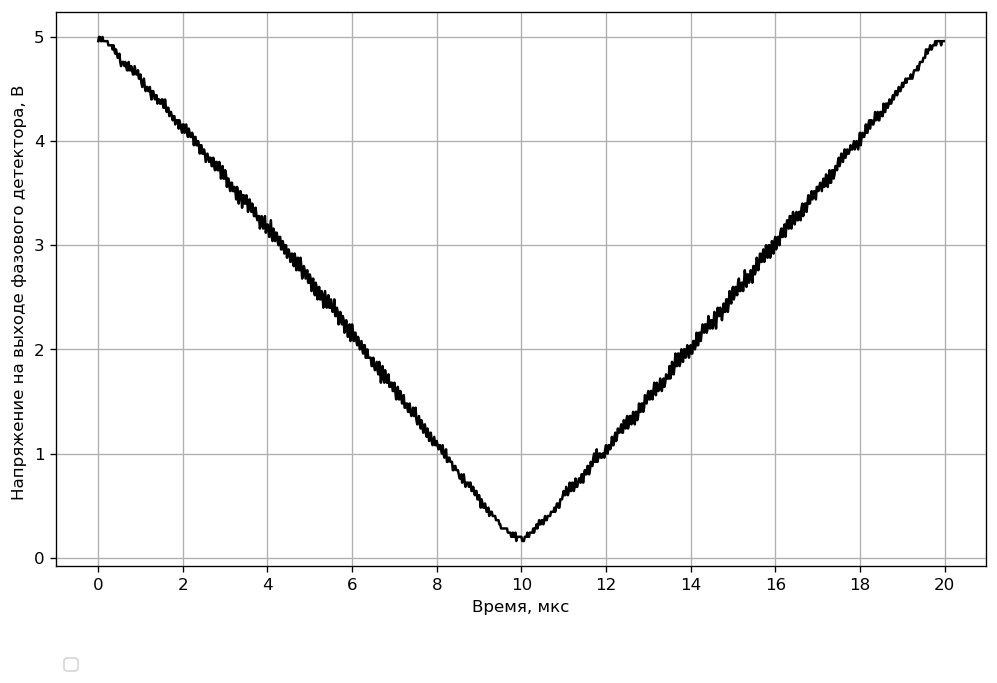

In [1253]:
# Построение графиков
plt.figure(figsize=(10, 6), dpi=120)
new_xticks = np.arange(0, 42, 2)  # Задаем метки от 0 до 42 мкс с шагом 2 мкс

# Осциллограмма для CH1
plt.plot(time_mks, E_FD, color='red')
plt.xlabel('Время, мкс')
plt.ylabel('Напряжение на выходе фазового детектора, В ')
plt.legend(bbox_to_anchor=(0, -0.15), loc='upper left', prop={'size': 10})
plt.grid(True)
plt.xticks(new_xticks)
plt.show()


new_xticks_phi = np.arange(0, 22, 2)  # Задаем метки от 0 до 42 мкс с шагом 2 мкс

# Построение графиков
plt.figure(figsize=(10, 6), dpi=120)
# Осциллограмма для CH1
plt.plot(time_mks_phi, E_FD_phi, color='black')
plt.xlabel('Время, мкс')
plt.ylabel('Напряжение на выходе фазового детектора, В ')
plt.legend(bbox_to_anchor=(0, -0.15), loc='upper left', prop={'size': 10})
plt.grid(True)
plt.xticks(new_xticks_phi)
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


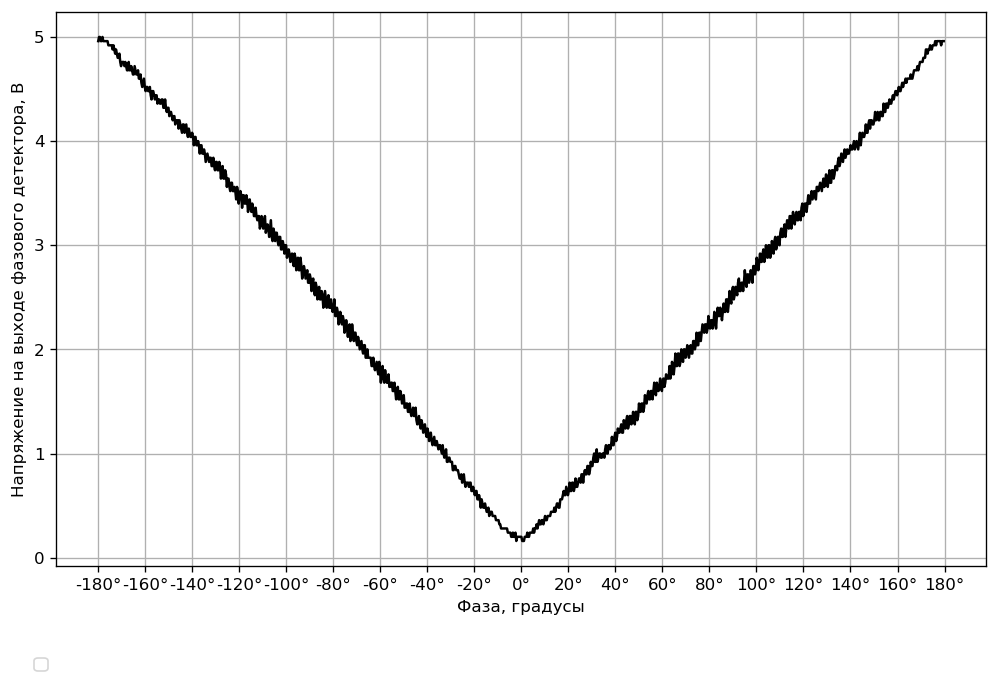

In [1254]:
# Предположим, что 0 мкс = -180°, 20 мкс = 180°
def time_to_phase(time_mks):
    return (time_mks / 20) * 360 - 180  # Настройте коэффициенты под ваши данные!

# Создаем кастомный форматтер
class PhaseFormatter(ticker.FuncFormatter):
    def __init__(self):
        super().__init__(lambda x, pos: f'{int(time_to_phase(x))}°')

# Построение графика
plt.figure(figsize=(10, 6), dpi=120)
plt.plot(time_mks_phi, E_FD_phi, color='black')

# Настраиваем ось X
ax = plt.gca()
ax.xaxis.set_major_formatter(PhaseFormatter())  # Применяем наш форматтер
ax.set_xlabel('Фаза, градусы')

# Ручная настройка сетки (шаг 45°)
phase_ticks = np.arange(-180, 181, 20)
time_ticks = (phase_ticks + 180) * (20 / 360)  # Обратное преобразование градусы → время
ax.set_xticks(time_ticks)
ax.set_xticklabels([f'{int(deg)}°' for deg in phase_ticks])

plt.ylabel('Напряжение на выходе фазового детектора, В')
plt.legend(bbox_to_anchor=(0, -0.15), loc='best', prop={'size': 10})
plt.grid(True)
plt.show()

По графику можно судить, что частота биений равна 50кГц. Значит fоп выбрана верно. 

### 5.4 Измерение полосы захвата

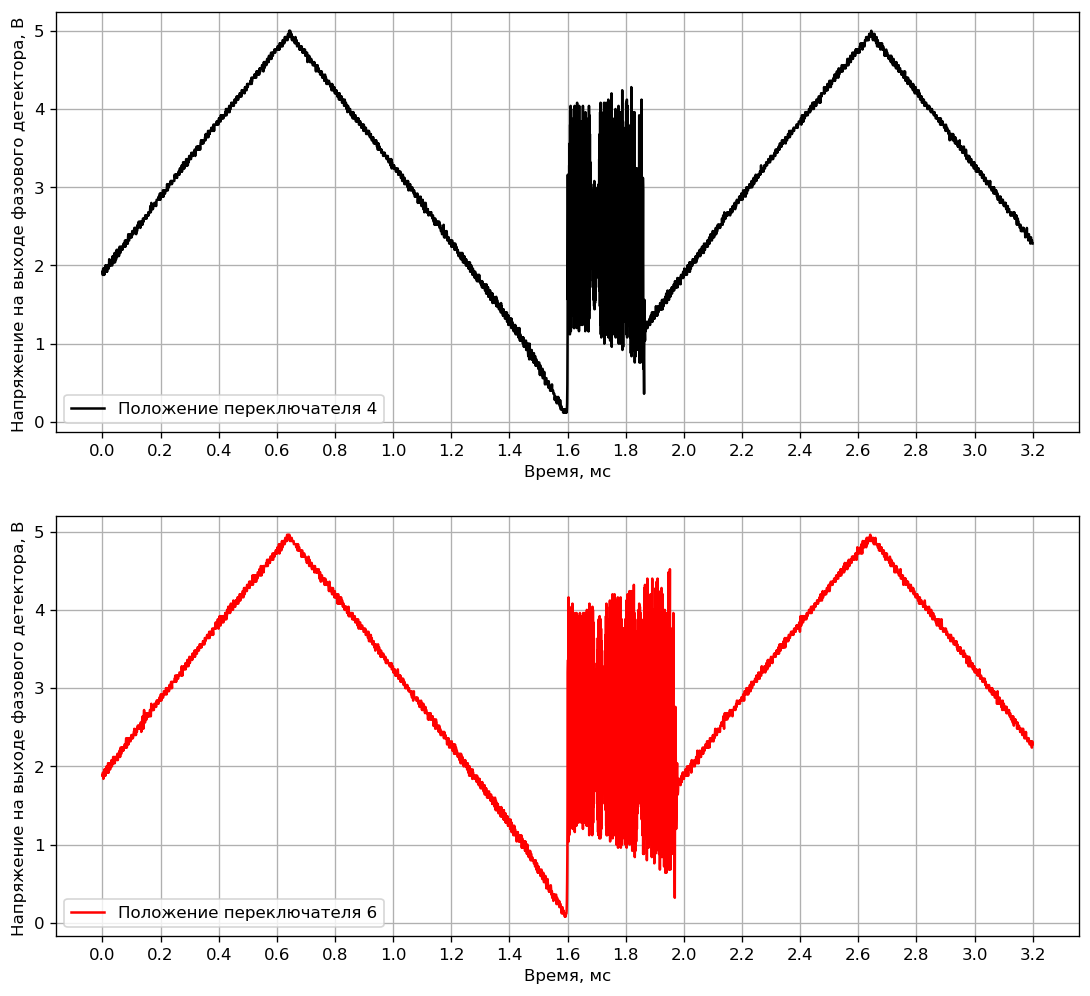

In [1255]:
#data_5_4_1 - Положение переключателя 4
#data_5_4_2 - Положение переключателя 6


# В этих файлах время дискретизации другое. Следовательно его нужно переопределить

discrete_time_1 = 8.000000e-07 # значение дискрета по времени, взятое из таблицы csv

# Создание вектора времени
time_1 = np.arange(0, 4000 * discrete_time_1, discrete_time_1)
time_ms_1 = time_1 * 1e3 # Перевод времени в миллисекунды (умножаем на 10^3)

E_FD_1 = data_5_4_1.iloc[0:4001]['CH1 [V]']
E_FD_2 = data_5_4_2.iloc[0:4001]['CH1 [V]']

new_xticks_1 = np.arange(0, 3.4, 0.2)  # Задаем метки от 0 до 42 мкс с шагом 2 мкс

# Построение графиков
plt.figure(figsize=(11, 10), dpi=120)
# Осциллограмма для CH1
plt.subplot(2, 1, 1)
plt.plot(time_ms_1, E_FD_1, label='Положение переключателя 4', color='black')
plt.xlabel('Время, мс')
plt.ylabel('Напряжение на выходе фазового детектора, В ')
plt.grid(True)
plt.xticks(new_xticks_1)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_ms_1, E_FD_2, label='Положение переключателя 6', color='red')
plt.xlabel('Время, мс')
plt.ylabel('Напряжение на выходе фазового детектора, В ')
plt.grid(True)
plt.xticks(new_xticks_1)
plt.legend()
plt.show()



In [1256]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Ваши данные
discrete_time_1 = 8.000000e-07
time_1 = np.arange(0, 4000 * discrete_time_1, discrete_time_1)
time_ms_1 = time_1 * 1e3
E_FD_1 = data_5_4_1.iloc[0:4001]['CH1 [V]']
E_FD_2 = data_5_4_2.iloc[0:4001]['CH1 [V]']

# Создаем фигуру
fig = make_subplots(
    rows=2, 
    cols=1,
    subplot_titles=('Положение переключателя 4', 'Положение переключателя 6')
)

# График 1 (добавлена закрывающая скобка для go.Scatter и запятая перед row/col)
fig.add_trace(
    go.Scatter(
        x=time_ms_1,
        y=E_FD_1,
        name='Переключатель 4',
        line=dict(color='blue')
    ),  # <-- Закрывающая скобка и запятая
    row=1,
    col=1
)

# График 2
fig.add_trace(
    go.Scatter(
        x=time_ms_1,
        y=E_FD_2,
        name='Переключатель 6',
        line=dict(color='green')
    ),  # <-- Закрывающая скобка и запятая
    row=2,
    col=1
)

# Настройки осей (добавлены закрывающие скобки)
fig.update_xaxes(
    title_text="Время, мс",
    range=[0, 3.4],
    dtick=0.2,
    row=1,
    col=1
)

fig.update_xaxes(
    title_text="Время, мс",
    range=[0, 3.4],
    dtick=0.2,
    row=2,
    col=1
)

fig.update_layout(
    height=3000,
    width=1200,
    title_text="Анализ сигналов"
)

# Корректный вызов отображения
fig.show()

### 5.5 Измерение переходных процессов по частоте

In [1257]:
#data_5_5_1 - положение 2
#data_5_5_2 - положение 4
#data_5_5_3 - положение 6

# В этих файлах время дискретизации другое. Следовательно его нужно переопределить

discrete_time_2 = 8.000000e-09 # значение дискрета по времени, взятое из таблицы csv

# Создание вектора времени
time_2 = np.arange(0, 3998 * discrete_time_2, discrete_time_2)
time_mks_2 = time_2 * 1e6 # Перевод времени в микросекунды (умножаем на 10^6)

E_FD_1_1 = data_5_5_1.iloc[0:3999]['CH1 [V]']
E_FD_2_1 = data_5_5_1.iloc[0:3999]['CH2 [V]']

# E_FD_1_1 = E_FD_1_1[::-1]
# E_FD_2_1 = E_FD_2_1[::-1]

E_FD_1_2 = data_5_5_2.iloc[0:3999]['CH1 [V]']
E_FD_2_2 = data_5_5_2.iloc[0:3999]['CH2 [V]']

# E_FD_1_2 = E_FD_1_2[::-1]
# E_FD_2_2 = E_FD_2_2[::-1]

E_FD_1_3 = data_5_5_3.iloc[0:3999]['CH1 [V]']
E_FD_2_3 = data_5_5_3.iloc[0:3999]['CH2 [V]']

# E_FD_1_3 = E_FD_1_3[::-1]
# E_FD_2_3 = E_FD_2_3[::-1]

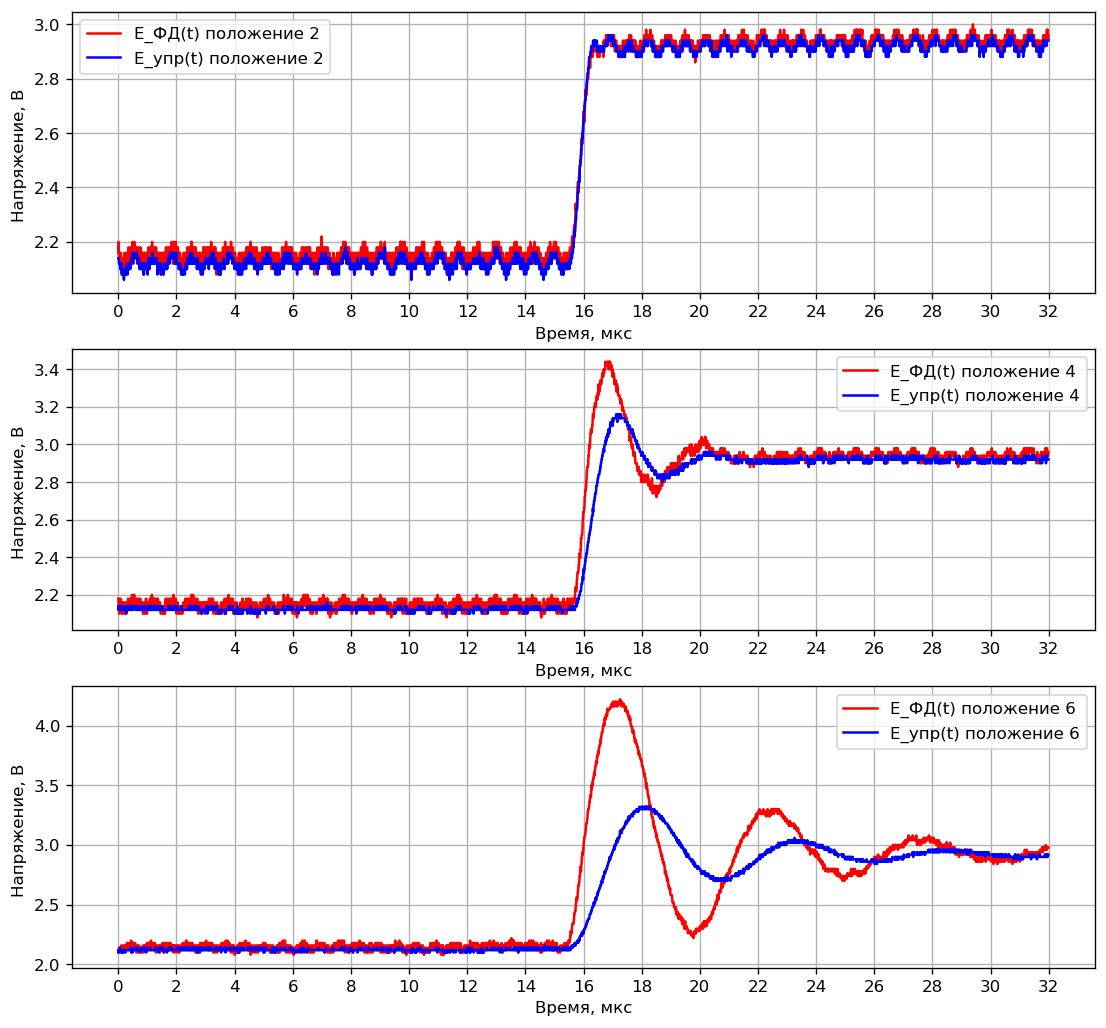

In [1258]:
# Построение графиков
plt.figure(figsize=(11, 14), dpi=120)

new_xticks_2 = np.arange(0, 34, 2)  # Задаем метки от 0 до 42 мкс с шагом 2 мкс
# Осциллограмма для CH1
plt.subplot(4, 1, 1)
plt.plot(time_mks_2, E_FD_1_1, label='Е_ФД(t) положение 2', color='red')
plt.plot(time_mks_2, E_FD_2_1, label='Е_упр(t) положение 2', color='blue')
plt.xlabel('Время, мкс')
plt.ylabel('Напряжение, В ')
plt.grid(True)
plt.xticks(new_xticks_2)
plt.legend()



plt.subplot(4, 1, 2)
plt.plot(time_mks_2, E_FD_1_2, label='Е_ФД(t) положение 4', color='red')
plt.plot(time_mks_2, E_FD_2_2, label='Е_упр(t) положение 4', color='blue')
plt.xlabel('Время, мкс')
plt.ylabel('Напряжение, В ')
plt.grid(True)
plt.xticks(new_xticks_2)
plt.legend()


plt.subplot(4, 1, 3)
plt.plot(time_mks_2, E_FD_1_3, label='Е_ФД(t) положение 6', color='red')
plt.plot(time_mks_2, E_FD_2_3, label='Е_упр(t) положение 6', color='blue')
plt.xlabel('Время, мкс')
plt.ylabel('Напряжение, В ')
plt.grid(True)
plt.xticks(new_xticks_2)
plt.legend()

plt.show()


### 5.6 Измерение переходных процессов по фазе

In [1259]:
#data_5_6_1 - положение 1
#data_5_6_2 - положение 3
#data_5_6_3 - положение 4

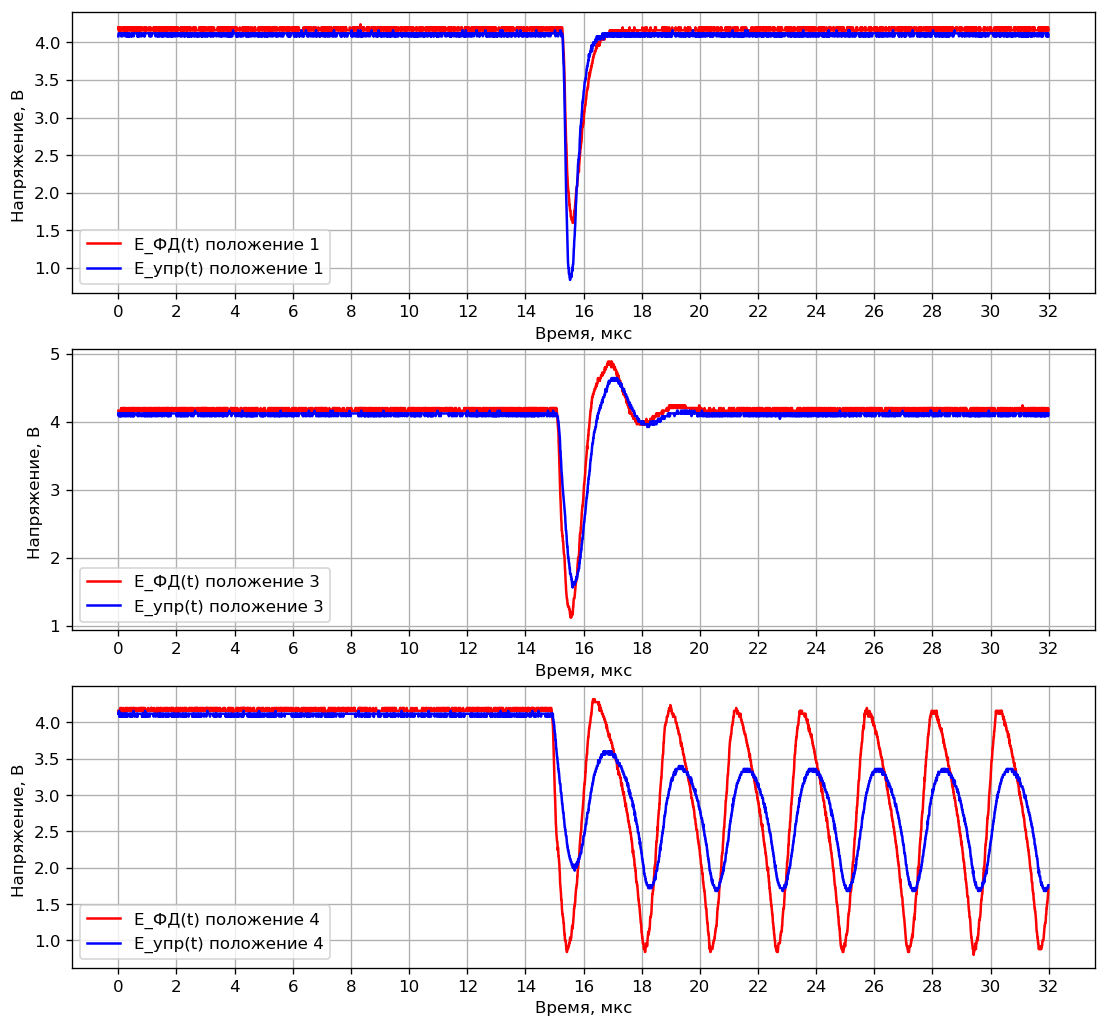

In [1260]:
E_FD_1_1_1 = data_5_6_1.iloc[0:3999]['CH1 [V]']
E_FD_2_1_1 = data_5_6_1.iloc[0:3999]['CH2 [V]']

E_FD_1_2_2 = data_5_6_2.iloc[0:3999]['CH1 [V]']
E_FD_2_2_2 = data_5_6_2.iloc[0:3999]['CH2 [V]']

E_FD_1_3_3 = data_5_6_3.iloc[0:3999]['CH1 [V]']
E_FD_2_3_3 = data_5_6_3.iloc[0:3999]['CH2 [V]']

# Построение графиков
plt.figure(figsize=(11, 14), dpi=120)

# Осциллограмма для CH1
plt.subplot(4, 1, 1)
plt.plot(time_mks_2, E_FD_1_1_1, label='Е_ФД(t) положение 1', color='red')
plt.plot(time_mks_2, E_FD_2_1_1, label='Е_упр(t) положение 1', color='blue')
plt.xlabel('Время, мкс')
plt.ylabel('Напряжение, В ')
plt.grid(True)
plt.xticks(new_xticks_2)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(time_mks_2, E_FD_1_2_2, label='Е_ФД(t) положение 3', color='red')
plt.plot(time_mks_2, E_FD_2_2_2, label='Е_упр(t) положение 3', color='blue')
plt.xlabel('Время, мкс')
plt.ylabel('Напряжение, В ')
plt.grid(True)
plt.xticks(new_xticks_2)
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(time_mks_2, E_FD_1_3_3, label='Е_ФД(t) положение 4', color='red')
plt.plot(time_mks_2, E_FD_2_3_3, label='Е_упр(t) положение 4', color='blue')
plt.xlabel('Время, мкс')
plt.ylabel('Напряжение, В ')
plt.grid(True)
plt.xticks(new_xticks_2)
plt.legend()

plt.show()

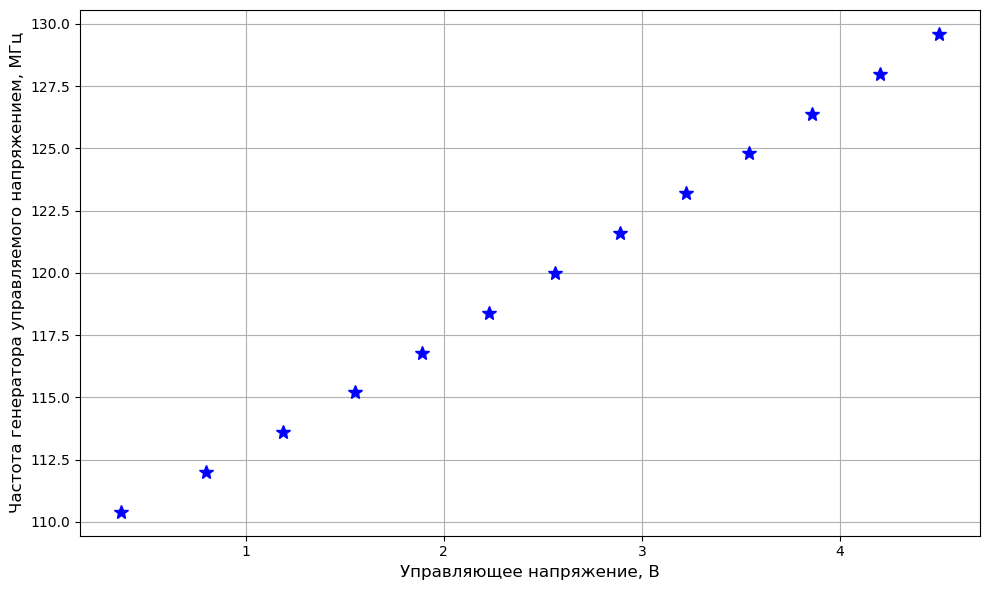

In [1261]:
# Построение характеристики управления частотой ГУН fгун(Еупр)

# Данные
Еupr = [0.37, 0.8, 1.19, 1.55, 1.89, 2.23, 2.56, 2.89, 3.22, 3.54, 3.86, 4.2, 4.5]
fgun =[110.4, 112, 113.6, 115.2, 116.8, 118.4, 120,	121.6, 123.2, 124.8, 126.4, 128, 129.6]

# Создание фигуры с двумя субплотами
plt.figure(figsize=(10, 6))

# График для математических ожиданий
plt.plot(Еupr, fgun, marker='*', linestyle='none',ms = 10, color='blue')
plt.xlabel('Управляющее напряжение, В', fontsize=12)
plt.ylabel('Частота генератора управляемого напряжением, МГц', fontsize=12)
plt.grid(True)

# Настройка отступов и отображение
plt.tight_layout()
plt.show()

### Пункт 1. Домашняя работа

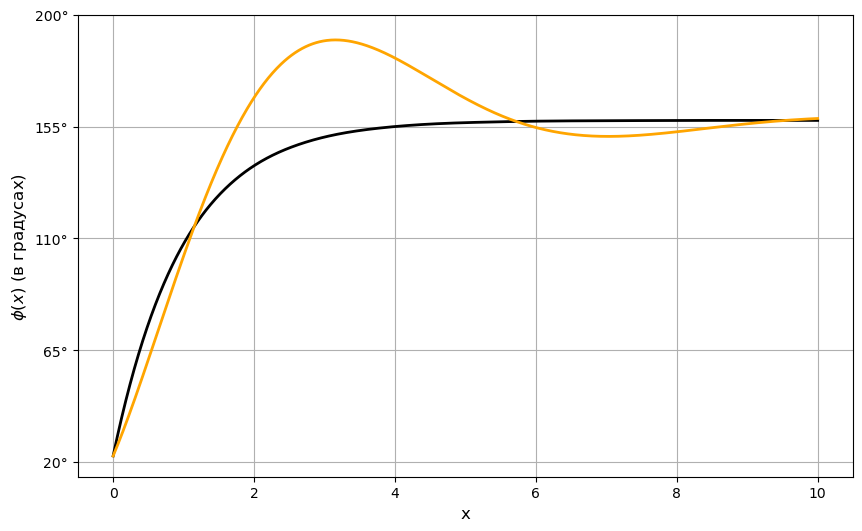

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# delta = 0.5mks * 2 * pi * 375000
# 375000 - скачок частоты в начальный момент времени

new_yticks_1 = np.arange(np.pi/9, 11*np.pi/9, np.pi/4)  # Задаем метки от 0 до 42 мкс с шагом 2 мкс

# Определение дифференциального уравнения
def dphi_dx(x, phi):
    return (7*np.pi / 8) - phi

def dydx_T1(x, y):
    y1, y2 = y  # y1 = φ, y2 = dφ/dx
    dy1dx = y2
    dy2dx = (7*np.pi / 8 - y2 - y1) / 1  # Из исходного уравнения
    return [dy1dx, dy2dx]

def dydx_T2(x, y):
    y1, y2 = y  # y1 = φ, y2 = dφ/dx
    dy1dx = y2
    dy2dx = (7*np.pi / 8 - y2 - y1) / 1.2  # Из исходного уравнения
    return [dy1dx, dy2dx]

def dydx_T3(x, y):
    y1, y2 = y  # y1 = φ, y2 = dφ/dx
    dy1dx = y2
    dy2dx = (7*np.pi / 8 - y2 - y1) / 1.4  # Из исходного уравнения
    return [dy1dx, dy2dx]


# Начальное условие
phi0 = [np.pi / 8]
y0 = [np.pi / 8, 3*np.pi / 8] #! Точно ли тут начальная производная 3*np.pi / 8

# Диапазон интегрирования и точки вывода
x_span = (0, 10)
x_eval = np.linspace(0, 10, 1000)




# Численное решение
sol_1 = solve_ivp(dphi_dx, 
                x_span, 
                phi0, 
                t_eval=x_eval, 
                method='RK45')

sol_2 = solve_ivp(dydx_T1, 
                x_span, 
                y0, 
                t_eval=x_eval, 
                method='RK45')

sol_3 = solve_ivp(dydx_T2, 
                x_span, 
                y0, 
                t_eval=x_eval, 
                method='RK45')

sol_4 = solve_ivp(dydx_T3, 
                x_span, 
                y0, 
                t_eval=x_eval, 
                method='RK45')


# Настройка форматера для оси Y (радианы → градусы)
def rad_to_deg_formatter(x, pos):
    degrees = np.degrees(x)
    return f"{degrees:.0f}°"

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(sol_1.t, sol_1.y[0], color='black', linewidth=2, label = 'T -> 0')
# plt.plot(sol_2.t, sol_2.y[0], color='red', linewidth=2, label = 'T1 = 0.5 мкс')
plt.plot(sol_3.t, sol_3.y[0], color='orange', linewidth=2, label = 'T2 = 0.6 мкс')
# plt.plot(sol_4.t, sol_4.y[0], color='black', linewidth=2, label = 'T3 = 0.7 мкс')
plt.xlabel('x', fontsize=12)
plt.ylabel(r'$\phi(x)$', fontsize=12)
plt.yticks(new_yticks_1)
#plt.title(r'Решение уравнения $\frac{d\phi}{dx} + \phi = \frac{5\pi}{9}$', fontsize=14)
#plt.title(r'x = $\frac{T}{T_фапч}$', fontsize=14)
plt.grid(True, linestyle='-', alpha=1)
#plt.legend()

# Применение форматера к оси Y
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(rad_to_deg_formatter))
plt.gca().set_ylabel(r'$\phi(x)$ (в градусах)')

plt.show()

### Пункт 2. Домашняя работа

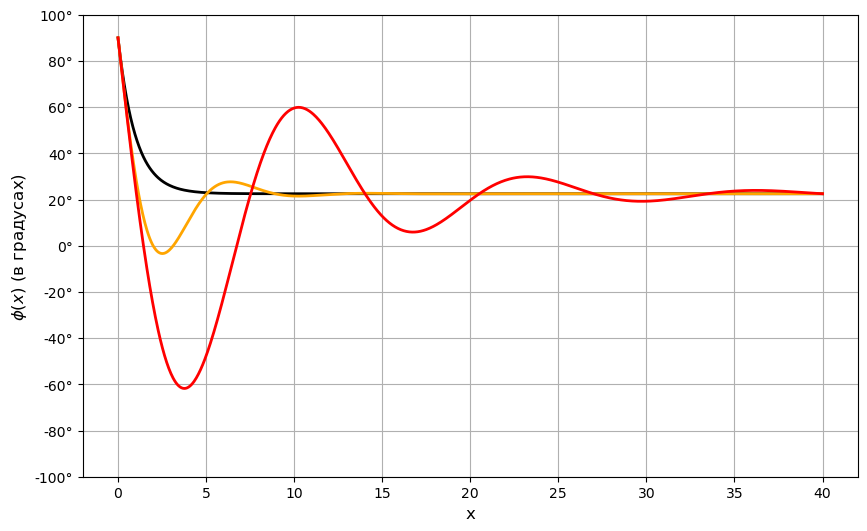

In [1263]:
new_yticks_2 = np.arange(-5*np.pi/9, 6*np.pi/9, np.pi/9)  # Задаем метки от 0 до 42 мкс с шагом 2 мкс

# Определение дифференциального уравнения
def dphi_dx_1(x, phi):
    return np.pi/8 - phi  # Уравнение: dφ/dx = 1.38 - φ

def dydx_1_1(x, y):
    y1, y2 = y  # y1 = φ, y2 = dφ/dx
    dy1dx = y2
    dy2dx = (np.pi/8 - y2 - y1) / 1  # Из исходного уравнения
    return [dy1dx, dy2dx]

def dydx_2_1(x, y):
    y1, y2 = y  # y1 = φ, y2 = dφ/dx
    dy1dx = y2
    dy2dx = (np.pi/8 - y2 - y1) / 1.2  # Из исходного уравнения
    return [dy1dx, dy2dx]

def dydx_3_1(x, y):
    y1, y2 = y  # y1 = φ, y2 = dφ/dx
    dy1dx = y2
    dy2dx = (np.pi/8 - y2 - y1) / 1.4  # Из исходного уравнения
    return [dy1dx, dy2dx]

def dydx_4_1(x, y):
    y1, y2 = y  # y1 = φ, y2 = dφ/dx
    dy1dx = y2
    dy2dx = (np.pi/8 - y2 - y1) / 4  # Из исходного уравнения
    return [dy1dx, dy2dx]

# Начальное условие
phi0_1 = [np.pi/2]  # φ(0) = π/2 ≈ 1.5708 радиан
# Начальные условия: [φ(0), φ'(0)]
y0_1 = [np.pi/2, -3*np.pi / 8] #! Точно ли тут начальная производная -3*np.pi / 8

# Диапазон интегрирования (x от 0 до 10)
x_span_1 = (0, 40)
x_eval_1 = np.linspace(0, 40, 1000)  # Точки для вывода

# Численное решение
sol_1_1 = solve_ivp(dphi_dx_1, 
                x_span_1, 
                phi0_1, 
                t_eval=x_eval_1, 
                method='RK45')

# Численное решение
sol_2_1 = solve_ivp(dydx_1_1, 
                x_span_1, 
                y0_1, 
                t_eval=x_eval_1, 
                method='RK45')

# Численное решение
sol_3_1 = solve_ivp(dydx_2_1, 
                x_span_1, 
                y0_1, 
                t_eval=x_eval_1, 
                method='RK45')

# Численное решение
sol_4_1 = solve_ivp(dydx_3_1, 
                x_span_1, 
                y0_1, 
                t_eval=x_eval_1, 
                method='RK45')

# Численное решение
sol_5_1 = solve_ivp(dydx_4_1, 
                x_span_1, 
                y0_1, 
                t_eval=x_eval_1, 
                method='RK45')

# Функция для форматирования оси Y (радианы → градусы)
def rad_to_deg_formatter(x, pos):
    degrees = np.degrees(x)
    return f"{degrees:.0f}°"

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(sol_1_1.t, sol_1_1.y[0], color='black', linewidth=2, label = 'T -> 0')
# plt.plot(sol_2_1.t, sol_2_1.y[0], color='red', linewidth=2, label = 'T1 = 0.5 мкс')
plt.plot(sol_3_1.t, sol_3_1.y[0], color='orange', linewidth=2, label = 'T2 = 0.6 мкс')
# plt.plot(sol_4_1.t, sol_4_1.y[0], color='black', linewidth=2, label = 'T3 = 0.7 мкс')
plt.plot(sol_5_1.t, sol_5_1.y[0], color='red', linewidth=2, label = 'T4 = 2 мкс')
plt.xlabel('x', fontsize=12)
plt.ylabel(r'$\phi(x)$', fontsize=12)
plt.yticks(new_yticks_2)
#plt.legend()
#plt.title(r'Решение уравнения $\frac{d\phi}{dx} + \phi = 1.38$', fontsize=14)
plt.grid(True, linestyle='-', alpha=1)

# Настройка отображения градусов на оси Y
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(rad_to_deg_formatter))
plt.gca().set_ylabel(r'$\phi(x)$ (в градусах)', fontsize=12)

plt.show()

Пункт 5. Отчёт

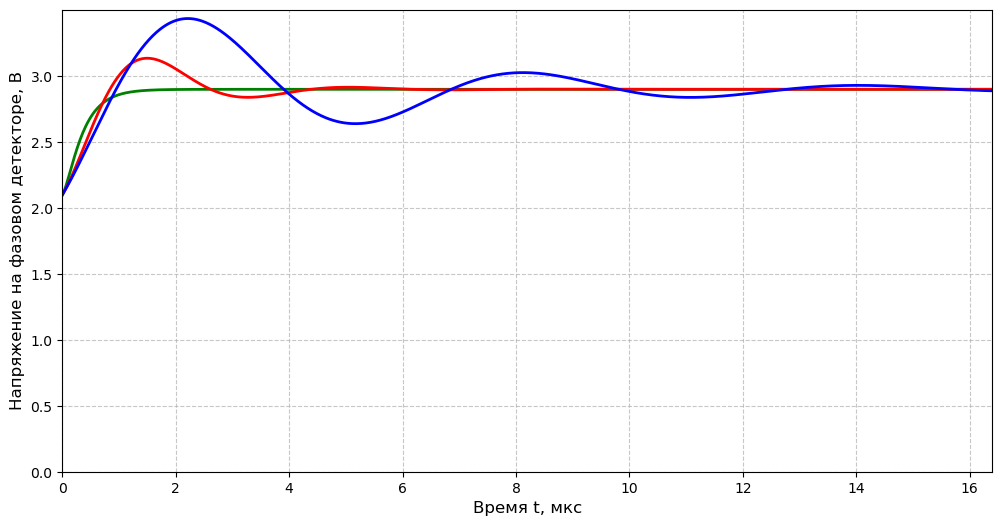

In [1264]:
# Параметры
Tфапч = 0.41  # В микросекундах (0.41 мкс)
x_max = 40  # Безразмерная переменная x
t_max = x_max * Tфапч  # Максимальное время в микросекундах (16.4 мкс)

# Определение уравнений второго порядка (относительно x)
def dydx_1(x, y):
    y1, y2 = y  # y1 = φ, y2 = dφ/dx
    dy1dx = y2
    dy2dx = (2.9 - y2 - y1) / 0.198  # Уравнение для τ = 0.198
    return [dy1dx, dy2dx]

def dydx_2(x, y):
    y1, y2 = y
    dy1dx = y2
    dy2dx = (2.9 - y2 - y1) / 1.6  # τ = 1.6
    return [dy1dx, dy2dx]

def dydx_3(x, y):
    y1, y2 = y
    dy1dx = y2
    dy2dx = (2.9 - y2 - y1) / 5  # τ = 5
    return [dy1dx, dy2dx]

# Начальные условия: [φ(0), dφ/dx(0)]
y0 = [2.1, 0.3]

# Безразмерная переменная x (от 0 до 40)
x_eval = np.linspace(0, x_max, 1000)

# Решение уравнений
sol1 = solve_ivp(dydx_1, [0, x_max], y0, t_eval=x_eval, method='RK45')
sol2 = solve_ivp(dydx_2, [0, x_max], y0, t_eval=x_eval, method='RK45')
sol3 = solve_ivp(dydx_3, [0, x_max], y0, t_eval=x_eval, method='RK45')

# Преобразование x в время t (микросекунды)
t1 = sol1.t * Tфапч
t2 = sol2.t * Tфапч
t3 = sol3.t * Tфапч

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(t1, sol1.y[0], color='green', linewidth=2, label='τ=0.198')
plt.plot(t2, sol2.y[0], color='red', linewidth=2, label='τ=1.6')
plt.plot(t3, sol3.y[0], color='blue', linewidth=2, label='τ=5')

# Настройка осей
plt.xlabel('Время t, мкс', fontsize=12)
plt.ylabel('Напряжение на фазовом детекторе, В', fontsize=12)
plt.xticks(np.arange(0, t_max + 1, 2))  # Метки от 0 до 16 мкс с шагом 2 мкс
plt.yticks(np.arange(0, 3.5, 0.5))  # Метки по вертикали (радианы)
plt.xlim(0, t_max)
plt.grid(True, linestyle='--', alpha=0.7)
#plt.legend()

plt.show()

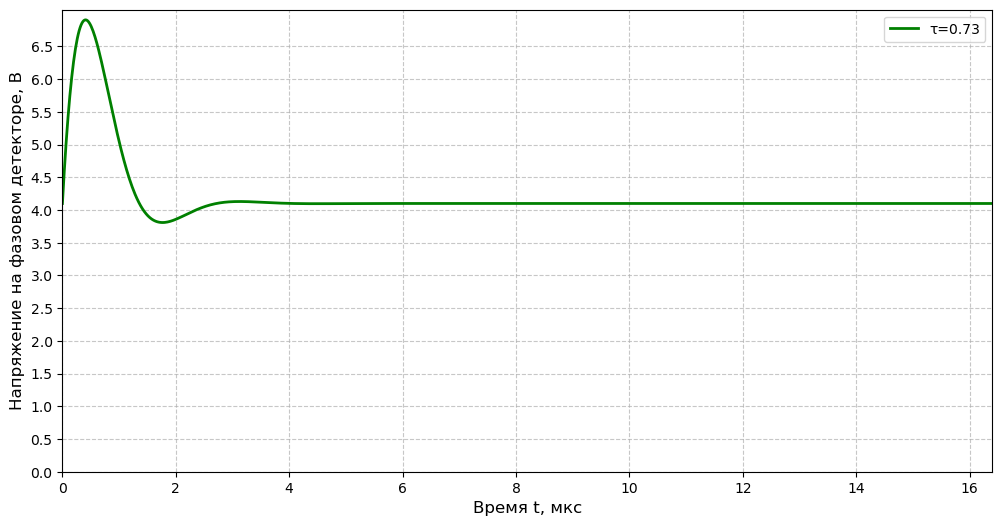

In [1265]:
# Параметры
Tфапч = 0.41  # В микросекундах (0.41 мкс)
x_max = 40  # Безразмерная переменная x
t_max = x_max * Tфапч  # Максимальное время в микросекундах (16.4 мкс)

# Определение уравнений второго порядка (относительно x)
def dydx_1(x, y):
    y1, y2 = y  # y1 = φ, y2 = dφ/dx
    dy1dx = y2
    dy2dx = (4.1 - y2 - y1) / 0.73  
    return [dy1dx, dy2dx]

# Начальные условия: [φ(0), dφ/dx(0)]
y0 = [4.1, 6.5]

# Безразмерная переменная x (от 0 до 40)
x_eval = np.linspace(0, x_max, 1000)

# Решение уравнений
sol1 = solve_ivp(dydx_1, [0, x_max], y0, t_eval=x_eval, method='RK45')

# Преобразование x в время t (микросекунды)
t1 = sol1.t * Tфапч


# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(t1, sol1.y[0], color='green', linewidth=2, label='τ=0.73')

# Настройка осей
plt.xlabel('Время t, мкс', fontsize=12)
plt.ylabel('Напряжение на фазовом детекторе, В', fontsize=12)
plt.xticks(np.arange(0, t_max + 1, 2))  # Метки от 0 до 16 мкс с шагом 2 мкс
plt.yticks(np.arange(0, 7, 0.5))  # Метки по вертикали (радианы)
plt.xlim(0, t_max)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.show()